In [59]:
import tensorflow as tf
import matplotlib.pyplot as plt

import numpy as np

from sklearn.metrics import confusion_matrix
from utils import make_confusion_matrix, plot_metrics

# Data Sources

Data coming from <a href="https://www.kaggle.com/datasets/astraszab/facial-expression-dataset-image-folders-fer2013">https://www.kaggle.com/datasets/astraszab/facial-expression-dataset-image-folders-fer2013</a>

# Define Class

In [17]:
cls = {
    "0": "Angry",
    "1": "Disgust",
    "2": "Fear",
    "3": "Happy",
    "4": "Sad",
    "5": "Surprise",
    "6": "Neutral"
}

## Update Class

I will update some of the class based on self-explanatory to depression and non-depression.

Non-depression: Class 0 (happy, surprise, neutral) <br />
Depression: Class 1 (angry, disgust, fear, sad)

In [12]:
cls = {
    "0": ["3", "5", "6"],
    "1": ["0", "1", "2", "4"],
}

In [21]:
cls = {
    "0": "Non-depression",
    "1": "Depression",
}

### Merge File

Merge the file in the folder with the class defined above in the file explorer

# Data Preparation

In [24]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "./data/Notebook 4 Data/train",
    image_size=(64, 64),
    batch_size=32,
    seed=42
)

valid_dataset = tf.keras.utils.image_dataset_from_directory(
    "./data/Notebook 4 Data/val",
    image_size=(64, 64),
    batch_size=32,
    seed=42
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    "./data/Notebook 4 Data/test",
    image_size=(64, 64),
    batch_size=32,
    seed=42
)


Found 28709 files belonging to 2 classes.
Found 3565 files belonging to 2 classes.
Found 3589 files belonging to 2 classes.


In [25]:
class_names = train_dataset.class_names

In [26]:
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.prefetch(tf.data.AUTOTUNE)

# Model Experiment

In [29]:
input = tf.keras.layers.Input(shape=(64, 64, 3))
x = tf.keras.layers.Conv2D(128, kernel_size=3)(input)
x = tf.keras.layers.Conv2D(256, kernel_size=3)(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(64, kernel_size=3)(x)
x = tf.keras.layers.Conv2D(32, kernel_size=3)(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Flatten()(x)
output = tf.keras.layers.Dense(1, activation="sigmoid")(x)

model_1 = tf.keras.Model(input, output)
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 62, 62, 128)       3584      
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 256)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        147520    
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        18464     
                                                           

In [30]:
model_1.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["acc"]
)

history_1 = model_1.fit(
    train_dataset,
    epochs=5,
    validation_data=(valid_dataset)
)

Epoch 1/5
898/898 [==============================] - 101s 96ms/step - loss: 3.2581 - acc: 0.5702 - val_loss: 0.9500 - val_acc: 0.5863
Epoch 2/5
898/898 [==============================] - 87s 97ms/step - loss: 0.8172 - acc: 0.5997 - val_loss: 0.7798 - val_acc: 0.6028
Epoch 3/5
898/898 [==============================] - 89s 99ms/step - loss: 0.7450 - acc: 0.6183 - val_loss: 1.1441 - val_acc: 0.5010
Epoch 4/5
898/898 [==============================] - 90s 100ms/step - loss: 0.7199 - acc: 0.6272 - val_loss: 0.7477 - val_acc: 0.6157
Epoch 5/5
898/898 [==============================] - 88s 98ms/step - loss: 0.7138 - acc: 0.6328 - val_loss: 0.7167 - val_acc: 0.6171


In [81]:
model_1.save("./model/Notebook 4/model_1.h5")

In [39]:
!tensorflowjs_converter --input_format keras --output_format=tfjs_graph_model model_1.h5 model/

Writing weight file model/model.json...

2022-06-01 02:10:39.481414: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-01 02:10:40.311422: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2151 MB memory:  -> device: 0, name: GeForce GTX 1650 Ti with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5
2022-06-01 02:10:41.414566: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
2022-06-01 02:10:42.526688: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-06-01 02:10:42.527250: I tensorflow/core/grappler/cluste

In [40]:
efficient_net = tf.keras.applications.EfficientNetB0(
    include_top=False)  # B0-B7
# include_top = False: Don't give me the output layer

efficient_net

In [41]:
# Let's check if the model is freeze
efficient_net.trainable

True

In [42]:
# We have to freeze the model weights during training for feature extraction
efficient_net.trainable = False

In [44]:
# Functional API
input = tf.keras.layers.Input(shape=(64, 64, 3))
x = efficient_net(input)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model_2 = tf.keras.Model(input, output)

model_2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 4,050,852
Trainable params: 1,281
Non-trainable params: 4,049,571
_________________________________________________________________


In [45]:
model_2.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['acc']
)

history_2 = model_2.fit(
    train_dataset,
    epochs=5,
    validation_data=(valid_dataset)
)

Epoch 1/5
898/898 [==============================] - 60s 55ms/step - loss: 0.6257 - acc: 0.6524 - val_loss: 0.6017 - val_acc: 0.6727
Epoch 2/5
898/898 [==============================] - 43s 48ms/step - loss: 0.6037 - acc: 0.6743 - val_loss: 0.5948 - val_acc: 0.6797
Epoch 3/5
898/898 [==============================] - 44s 49ms/step - loss: 0.5941 - acc: 0.6802 - val_loss: 0.5900 - val_acc: 0.6884
Epoch 4/5
898/898 [==============================] - 44s 48ms/step - loss: 0.5893 - acc: 0.6865 - val_loss: 0.5895 - val_acc: 0.6769
Epoch 5/5
898/898 [==============================] - 43s 47ms/step - loss: 0.5877 - acc: 0.6849 - val_loss: 0.5844 - val_acc: 0.6903


## Fine Tuning

In [46]:
len(efficient_net.layers)

237

In [47]:
# Unfreeze last 37 layers in the efficient_net
efficient_net.trainable = True

for layer in efficient_net.layers[:200]:
  layer.trainable = False

In [ ]:
model_2.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

In [49]:
model_2.fit(
    train_dataset,
    epochs=10,
    initial_epoch=history_2.epoch[-1],  # 4
    validation_data=(valid_dataset)
)

Epoch 5/10
898/898 [==============================] - 33s 37ms/step - loss: 0.5853 - acc: 0.6896 - val_loss: 0.5851 - val_acc: 0.6853
Epoch 6/10
898/898 [==============================] - 47s 53ms/step - loss: 0.5823 - acc: 0.6930 - val_loss: 0.5880 - val_acc: 0.6895
Epoch 7/10
898/898 [==============================] - 48s 54ms/step - loss: 0.5812 - acc: 0.6901 - val_loss: 0.5839 - val_acc: 0.6813
Epoch 8/10
898/898 [==============================] - 48s 54ms/step - loss: 0.5803 - acc: 0.6943 - val_loss: 0.5814 - val_acc: 0.6928
Epoch 9/10
898/898 [==============================] - 44s 49ms/step - loss: 0.5777 - acc: 0.6985 - val_loss: 0.5796 - val_acc: 0.6948
Epoch 10/10
898/898 [==============================] - 42s 47ms/step - loss: 0.5780 - acc: 0.6948 - val_loss: 0.5809 - val_acc: 0.6881


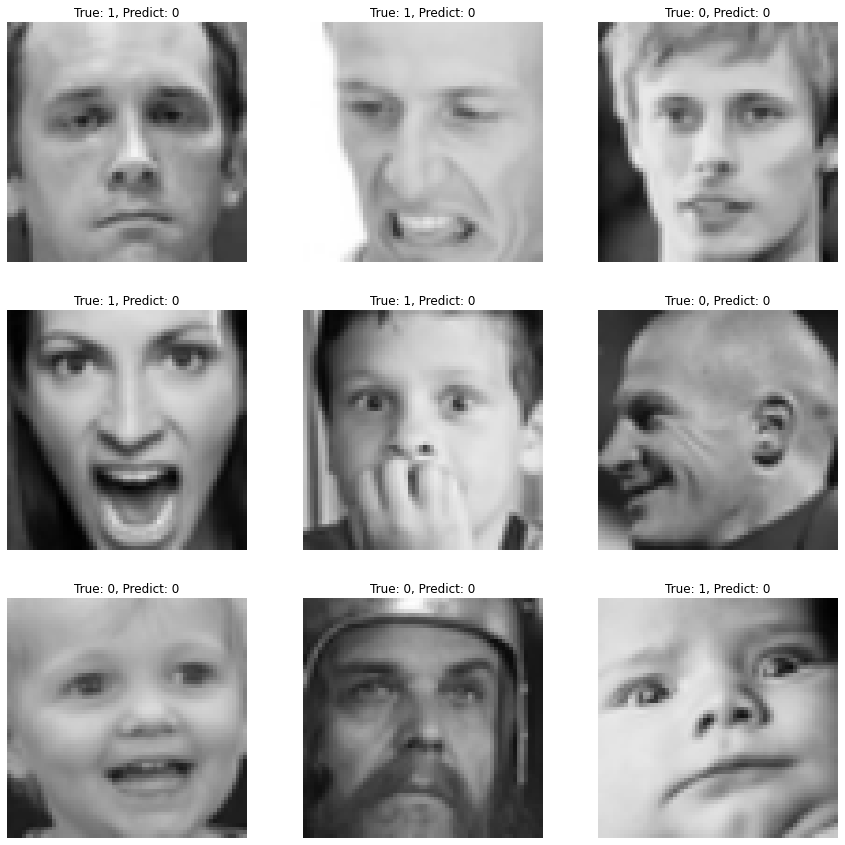

In [87]:
plt.figure(figsize=(15, 15))
for images, labels in valid_dataset.take(1):
  for i in range(9):
    pred_probs = model_2.predict(tf.expand_dims(images[i], axis=0))
    pred = tf.argmax(pred_probs[0])
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    title = f"True: {class_names[labels[i]]}, Predict: {class_names[pred]}"
    plt.title(title)
    plt.axis("off")

In [86]:
model_2.save("./model/Notebook 4/model_2.h5")

In [88]:
!tensorflowjs_converter --input_format keras --output_format=tfjs_graph_model model_2.h5 model/

2022-06-01 03:28:29.548144: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2

Writing weight file model/model.json...



To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-01 03:28:31.251912: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2017 MB memory:  -> device: 0, name: GeForce GTX 1650 Ti with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5
2022-06-01 03:28:59.314619: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
2022-06-01 03:30:01.934479: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-06-01 03:30:01.935256: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session
2022-06-01 03:30:01.937812: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2017 MB memory:  -> device: 0, name: GeForce GTX 165

# Model Evaluation

In [74]:
labels = ['True Non-depression', 'False Depression',
          'False Non-depression', 'True Depression']
categories = ['Non-depression', 'Depression']


In [76]:
y_true = np.concatenate([y for _, y in test_dataset], axis=0)
y_true

array([1, 0, 1, ..., 0, 0, 0])

In [78]:
def evaluate(model, name):
    y_pred = model.predict(test_dataset)
    y_pred = tf.where(y_pred > 0.5, 1, 0)
    
    make_confusion_matrix(
        confusion_matrix(y_true, y_pred),
        group_names=labels,
        categories=categories,
        cmap='coolwarm',
        title=f"{name} Confusion Matrix"
    )


## Evaluate self-defined model

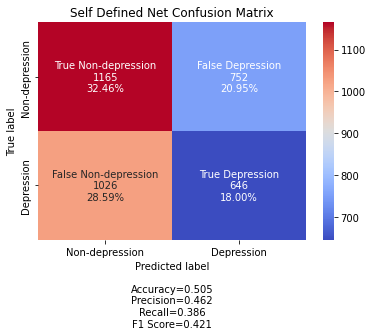

In [80]:
evaluate(model_1, "Self Defined Net")

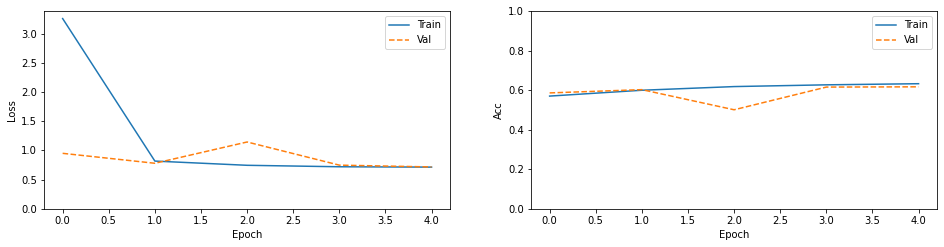

In [83]:
plt.figure(figsize=(16, 8))
plot_metrics(history_1)

## Evaluate Efficient Net Fine Tune model

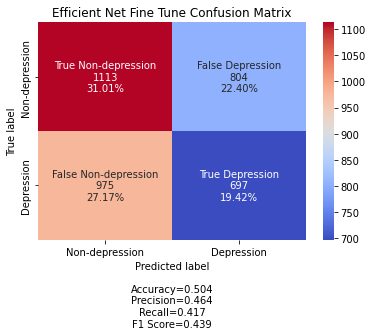

In [79]:
evaluate(model_2, "Efficient Net Fine Tune")

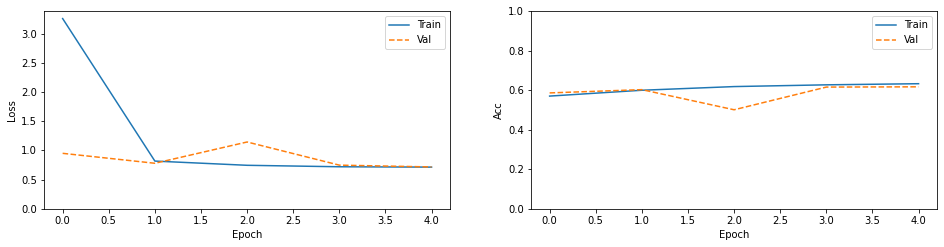

In [84]:
plt.figure(figsize=(16, 8))
plot_metrics(history_1)